### Import libraries


In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import plotly.express as px
import plotly.graph_objects as go
from pandas.plotting import lag_plot
from plotly.subplots import make_subplots

### Read data

In [17]:
df = pd.read_csv('dirty_cafe_sales.csv')

df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [18]:
df.describe().T

,count,unique,top,freq
Transaction ID,10000,10000,TXN_1961373,1
Item,9667,10,Juice,1171
Quantity,9862,7,5,2013
Price Per Unit,9821,8,3.0,2429
Total Spent,9827,19,6.0,979
Payment Method,7421,5,Digital Wallet,2291
Location,6735,4,Takeaway,3022
Transaction Date,9841,367,UNKNOWN,159


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [20]:
df.isnull().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

We can see that there are many absent values that we have to decide what to do with them

### Data Preprocessing

#### Data cleaning

In [21]:
# Replace 'ERROR' with NaN and convert relevant columns to numeric
df.replace('ERROR',pd.NA,inplace = True)
df['Quantity']=pd.to_numeric(df['Quantity'],errors='coerce')
df['Price Per Unit']=pd.to_numeric(df['Price Per Unit'],errors='coerce')
df['Total Spent']=pd.to_numeric(df['Total Spent'],errors='coerce')

In [22]:
# Drop rows with NaN in critical columns
df.dropna(subset=['Item', 'Total Spent'], inplace=True)

### Descriptive Statistics

In [23]:
total_revenue = df['Total Spent'].sum()
average_transaction_value = df['Total Spent'].mean()
item_popularity = df['Item'].value_counts()
payment_method_distribution = df['Payment Method'].value_counts()

In [24]:
# Print statistics
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Average Transaction Value: ${average_transaction_value:.2f}")
print("Item Popularity:\n", item_popularity)
print("Payment Method Distribution:\n", payment_method_distribution)

Total Revenue: $79381.00
Average Transaction Value: $8.92
Item Popularity:
 Item
Coffee      1115
Juice       1115
Salad       1096
Cake        1088
Sandwich    1065
Tea         1041
Cookie      1035
Smoothie    1024
UNKNOWN      322
Name: count, dtype: int64
Payment Method Distribution:
 Payment Method
Digital Wallet    2045
Credit Card       2024
Cash              2004
UNKNOWN            259
Name: count, dtype: int64


### Visualization

In [25]:
df.dropna(subset=['Transaction Date', 'Total Spent'], inplace=True)

unique_items = df['Item'].unique()[:30]  # Select the first 30 unique items

fig = make_subplots(rows=6, cols=5, subplot_titles=unique_items)
for i, item in enumerate(unique_items):
    item_data = df[df['Item'] == item].groupby('Transaction Date').sum().reset_index()
    
    # Create a line plot for the item
    fig.add_trace(
        go.Scatter(x=item_data['Transaction Date'], 
                   y=item_data['Total Spent'], 
                   mode='lines+markers', 
                   name=item),
        row=(i // 5) + 1, col=(i % 5) + 1
    )

# Update layout
fig.update_layout(height=1200, width=800, title_text="Sales Over Time for Different Items", showlegend=False)

# Show the plot
fig.show()

In [26]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], errors='coerce')
df['Total Spent'] = pd.to_numeric(df['Total Spent'], errors='coerce')
daily_sales = df.groupby('Transaction Date').sum().reset_index()
fig = px.line(daily_sales, x='Transaction Date', y='Total Spent', 
              title='Daily Total Sales Over Time',
              labels={'Transaction Date': 'Date', 'Total Spent': 'Total Sales'},
              markers=True)
fig.show()

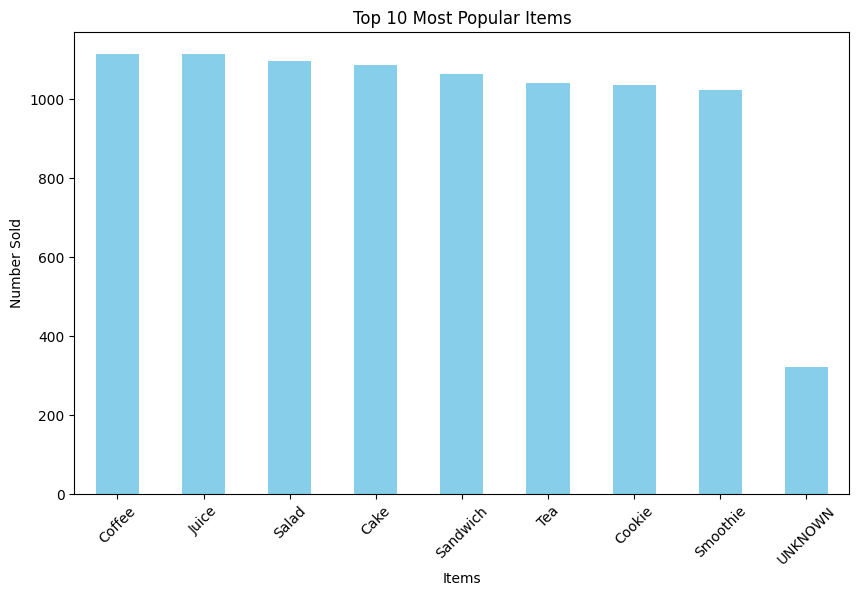

In [36]:
# Bar chart for item popularity
plt.figure(figsize=(10, 6))
item_popularity.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Items')
plt.xlabel('Items')
plt.ylabel('Number Sold')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Item'>

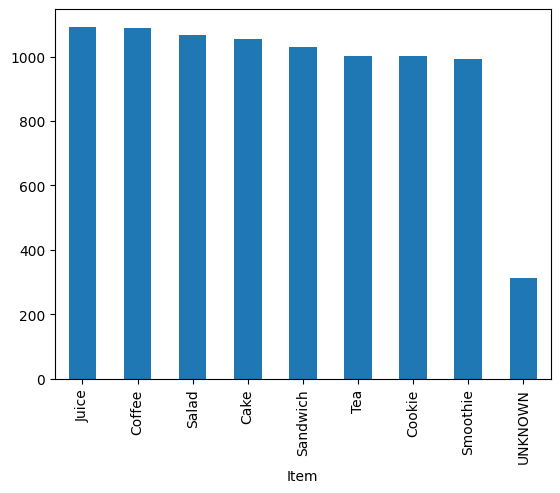

In [28]:
df['Item'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='Payment Method'>

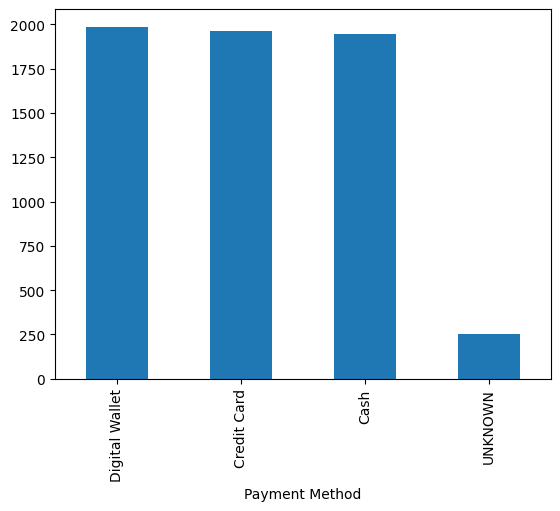

In [29]:
df['Payment Method'].value_counts().plot(kind='bar')

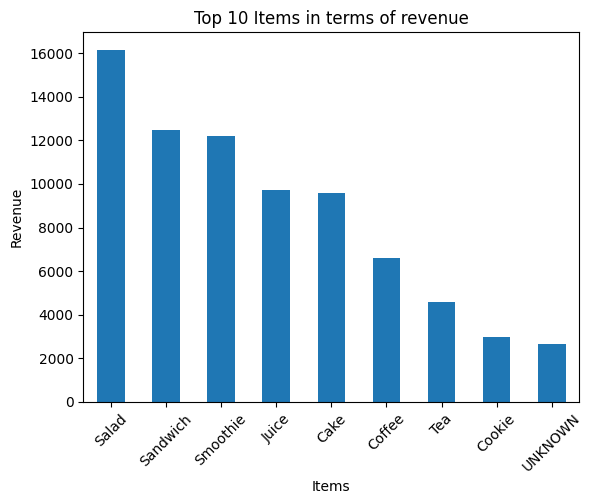

In [38]:
df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 Items in terms of revenue')
plt.xlabel('Items')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

The analysis of the top-selling and top-revenue-generating items reveals key insights into the company's sales performance. The Salad stands out as the most profitable item, generating the highest revenue, even though it is not the most frequently sold item. This suggests that Salad has a higher price per unit compared to other products.

On the other hand, the most popular items in terms of quantity sold include Coffee, Juice, and Salad, all with similar sales volumes. However, Coffee, despite being the most sold item, generates significantly less revenue than Salad, indicating a lower price per unit.

Interestingly, items like Juice and Sandwiches also rank high in revenue, which could suggest a complementary purchasing pattern. Customers ordering Salad might be inclined to purchase additional items such as Juice or Smoothies, potentially driving up overall revenue.

<Axes: xlabel='Location'>

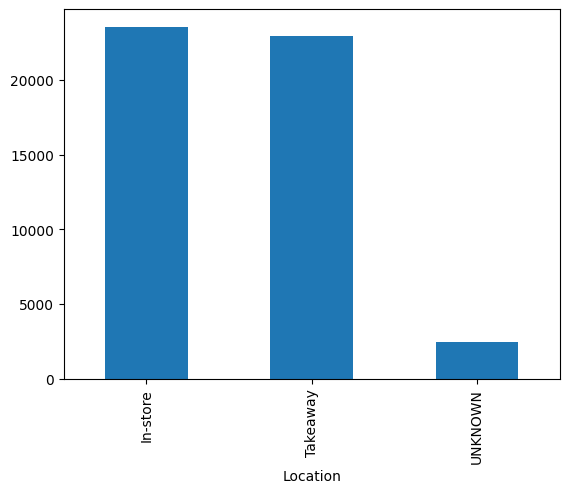

In [31]:
df.groupby('Location')['Total Spent'].sum().plot(kind='bar')

<Axes: xlabel='Item'>

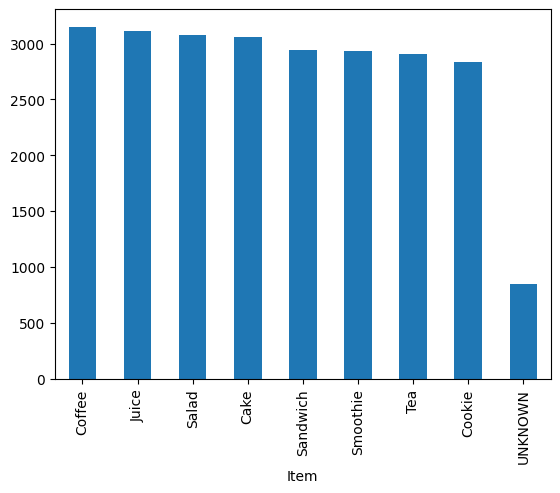

In [32]:
df.groupby('Item')['Quantity'].sum().sort_values(ascending=False).plot(kind='bar')

<Axes: >

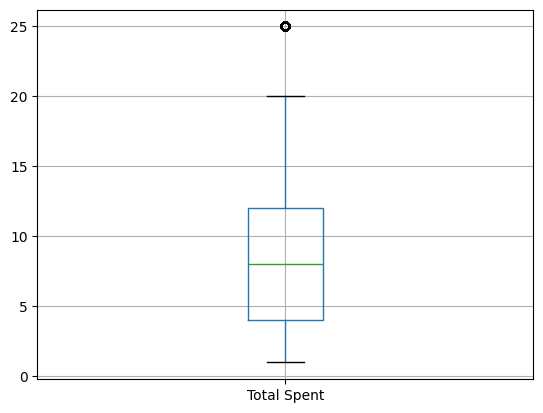

In [33]:
df.boxplot(column='Total Spent')

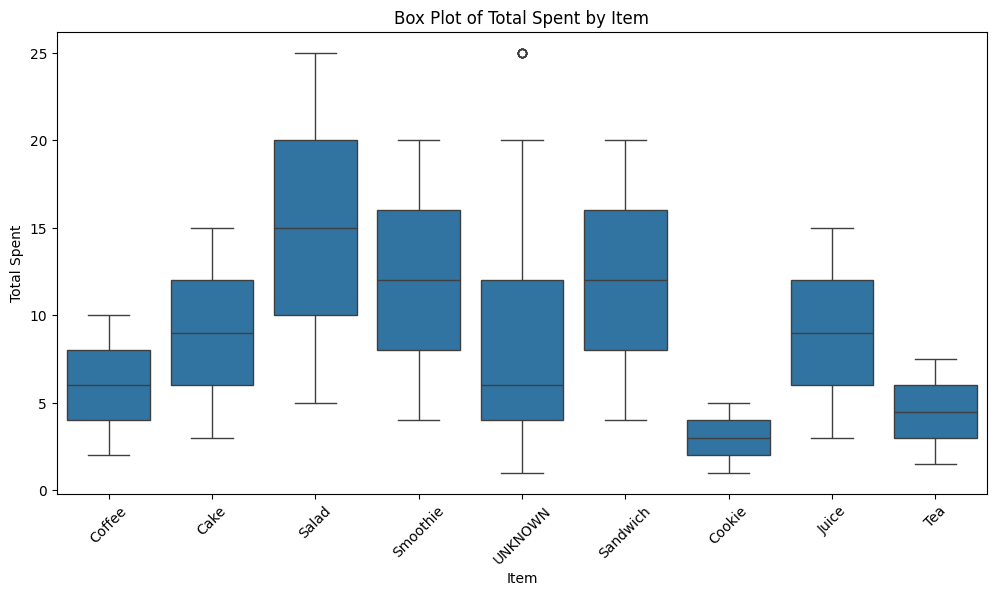

In [34]:
# Box plot for Total Spent by Item
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Item', y='Total Spent')
plt.title('Box Plot of Total Spent by Item')
plt.xticks(rotation=45)
plt.show()

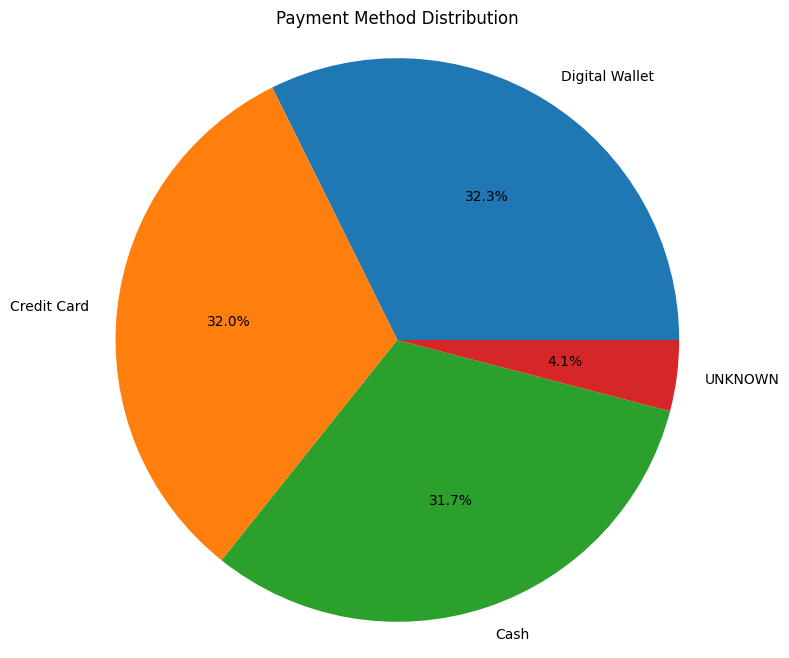

In [35]:

payment_counts = df['Payment Method'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()

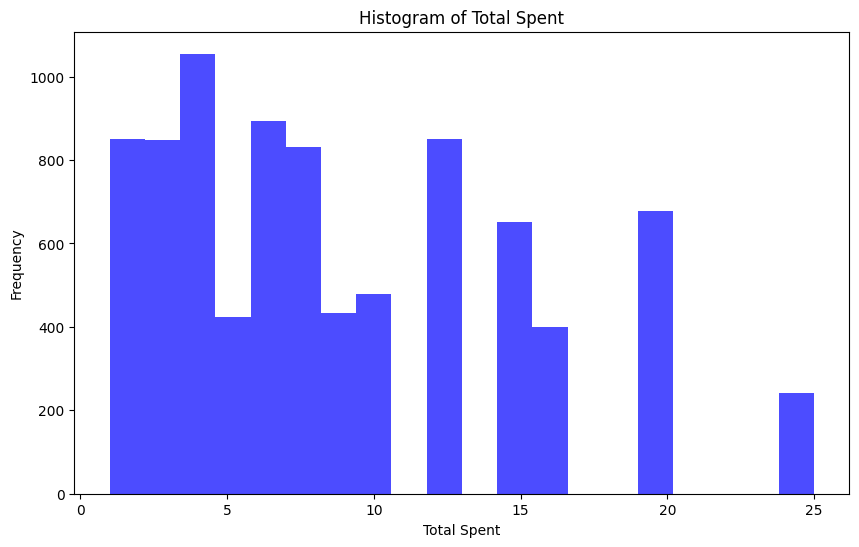

In [39]:

plt.figure(figsize=(10, 6))
plt.hist(df['Total Spent'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

### Recommendations

1. Optimize Menu Pricing for Maximum Revenue
Action: Adjust pricing for high-revenue items like Salad to ensure profitability while keeping them competitive. Additionally, consider bundling popular but lower-revenue items (e.g., Coffee + Sandwich) to increase overall spend per customer.
Reason: The high revenue from Salad suggests it has a strong perceived value. Bundling can encourage higher spending while maintaining customer satisfaction.

2. Enhance Cross-Selling Strategies
Action: Promote complementary items together, such as pairing Salads with Juice or Smoothies in meal deals. Use targeted recommendations based on customer purchase patterns.
Reason: Juice and Smoothies are frequently purchased alongside Salads, indicating an opportunity to drive additional sales through strategic promotions.

3. Address Low-Performing Items (e.g., UNKNOWN Category)
Action: Investigate the UNKNOWN category to determine if it consists of errors, outdated items, or unclassified products. If necessary, streamline or replace them with higher-performing alternatives.
Reason: Eliminating or redefining underperforming items ensures better inventory management and profitability.

4. Data-Driven Promotional Campaigns
Action: Use sales trends to create targeted promotions on high-revenue items and encourage repeat purchases. Implement limited-time offers on popular items to drive urgency.
Reason: Leveraging data for seasonal or time-sensitive promotions can increase sales volume and customer engagement.